In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import glob
import keras as k


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from keras.layers import Dense
from keras.models import Sequential, load_model
from sklearn.metrics import plot_confusion_matrix

In [4]:
#Importante ejectuar esto para poder hacer uso de tf en colab
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv(r"/content/drive/My Drive/datasetVIH.csv")
df.describe()

,numeroaminoacidos,molecularweight,theoreticalpI,instabilityindex,aliphaticindex,tipo
count,111.000000,1.110000e+02,111.000000,111.000000,111.000000,111.000000
mean,411.540541,9.058096e+05,9.024775,400.264234,82.031261,0.369369
std,350.216447,9.062494e+06,0.960468,3701.745914,14.854156,0.484823
min,22.000000,1.926150e+03,5.170000,24.070000,21.670000,0.000000
25%,95.500000,1.092315e+04,8.780000,37.850000,74.585000,0.000000
50%,217.000000,2.820407e+04,9.090000,41.740000,83.190000,0.000000
75%,839.000000,9.473676e+04,9.520000,47.580000,92.570000,1.000000
max,1449.000000,9.552406e+07,11.450000,39045.000000,121.330000,1.000000


In [7]:
df.head(25)

,numeroaminoacidos,molecularweight,theoreticalpI,instabilityindex,aliphaticindex,tipo
0,91,10411.77,10.18,35.70,86.70,0
1,839,95524055.00,8.78,39045.00,92.35,0
2,98,10686.67,8.73,44.93,121.33,0
3,504,56483.53,9.05,50.14,70.30,0
4,859,97275.06,8.92,39.41,93.39,0
5,856,96888.23,8.84,39.23,93.95,0
6,110,12398.21,9.16,30.05,76.18,0
7,93,10470.77,9.51,62.29,75.48,0
8,867,98632.66,8.70,37.81,95.43,0
9,90,9782.01,6.08,46.13,53.67,0


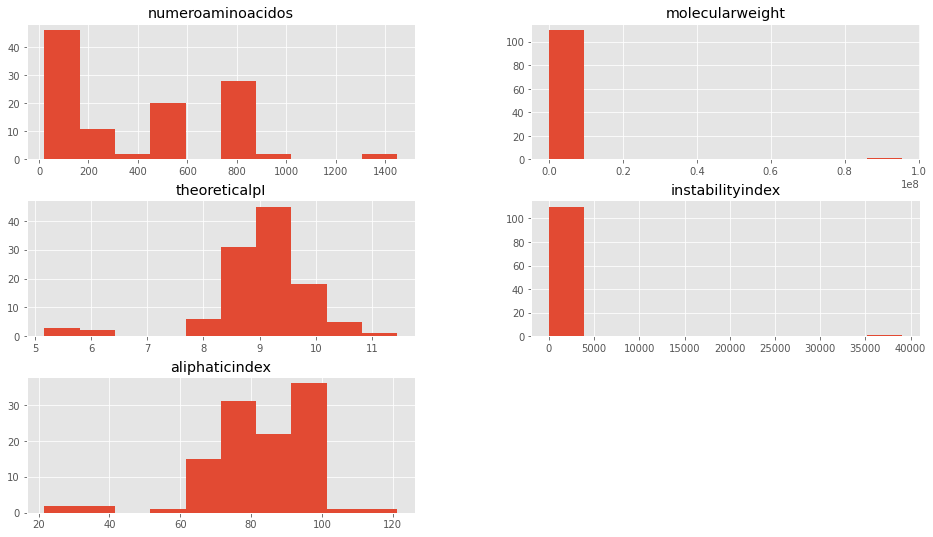

In [9]:
df.drop(['tipo'], axis=1).hist()
plt.show()

In [11]:
	
reduced = df.drop(['tipo'], axis=1)
reduced.describe()

,numeroaminoacidos,molecularweight,theoreticalpI,instabilityindex,aliphaticindex
count,111.000000,1.110000e+02,111.000000,111.000000,111.000000
mean,411.540541,9.058096e+05,9.024775,400.264234,82.031261
std,350.216447,9.062494e+06,0.960468,3701.745914,14.854156
min,22.000000,1.926150e+03,5.170000,24.070000,21.670000
25%,95.500000,1.092315e+04,8.780000,37.850000,74.585000
50%,217.000000,2.820407e+04,9.090000,41.740000,83.190000
75%,839.000000,9.473676e+04,9.520000,47.580000,92.570000
max,1449.000000,9.552406e+07,11.450000,39045.000000,121.330000


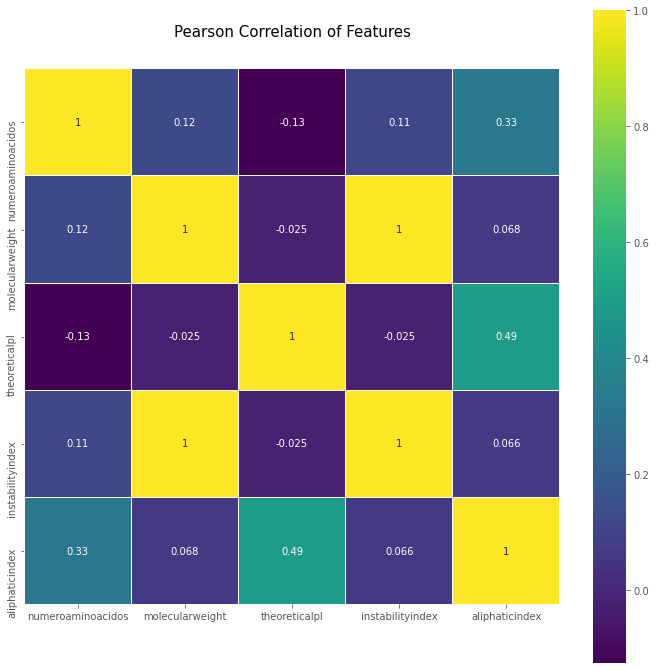

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(reduced.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [14]:
X=df.drop(['tipo'], axis=1)
y=df['tipo']
 
best=SelectKBest(k=2)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['numeroaminoacidos', 'aliphaticindex'], dtype='object')


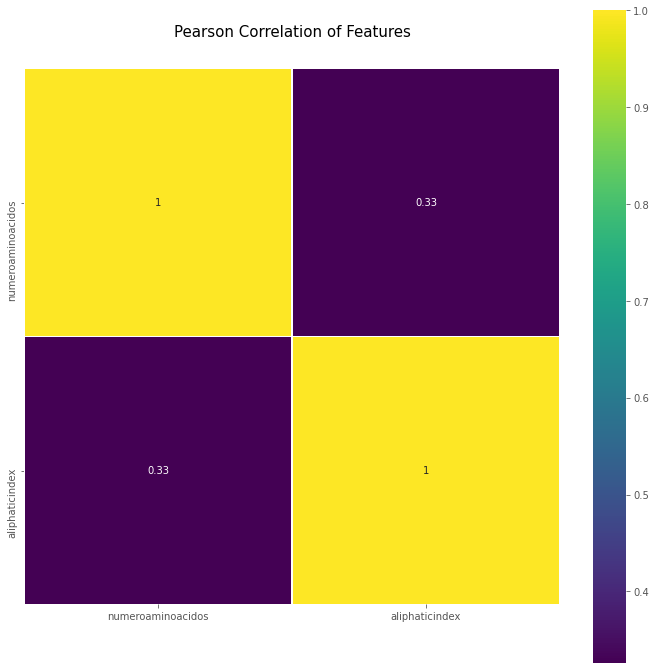

In [20]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [76]:
# Definimos nuestro entrenamiento y nuestro test.
X_train, X_test = train_test_split(df, test_size=0.33, random_state=67) 
y_train =X_train["tipo"]
y_test = X_test["tipo"]

In [77]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.64
Precisión en el set de Test: 0.65


In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
confusion_matrix(y_test,y_pred)



array([[22,  3],
       [10,  2]])